In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data=pd.read_csv('MTC.csv',parse_dates=['DATE'])
data.head()

,DATE,ACTIVE,CUTOFF,DEACTIVATED,EXPIRED,INSTALLED_PREACTIVE,SUSPENDED,UN_CATEGORIZED,USER TOTAL
0,2019-01-01,2406974,231434,3586,113713,654552,6347,186,3416792
1,2019-01-02,2407599,231996,3638,113281,650005,6526,186,3413231
2,2019-01-03,2408317,231693,4133,113459,645417,6408,189,3409616
3,2019-01-04,2408514,231281,4122,114426,640643,6361,195,3405542
4,2019-01-05,2408168,231134,3718,115360,636531,6337,193,3401441


In [3]:
data['DATE'] =pd.to_datetime(data['DATE'])
data.head()

,DATE,ACTIVE,CUTOFF,DEACTIVATED,EXPIRED,INSTALLED_PREACTIVE,SUSPENDED,UN_CATEGORIZED,USER TOTAL
0,2019-01-01,2406974,231434,3586,113713,654552,6347,186,3416792
1,2019-01-02,2407599,231996,3638,113281,650005,6526,186,3413231
2,2019-01-03,2408317,231693,4133,113459,645417,6408,189,3409616
3,2019-01-04,2408514,231281,4122,114426,640643,6361,195,3405542
4,2019-01-05,2408168,231134,3718,115360,636531,6337,193,3401441


# Predict the missing months
## Resample by month function allows to retreive missing month and mean will be used to predict these values

In [4]:
sample_interpol=data.resample('M',on='DATE').mean()
sample_interpol

,ACTIVE,CUTOFF,DEACTIVATED,EXPIRED,INSTALLED_PREACTIVE,SUSPENDED,UN_CATEGORIZED,USER TOTAL
DATE,,,,,,,,
2019-01-31,2.397903e+06,231445.354839,3632.580645,113501.161290,666680.483871,6770.580645,161.967742,3.420095e+06
2019-02-28,2.408499e+06,232599.178571,4141.357143,113815.428571,686343.428571,8588.000000,101.928571,3.454088e+06
2019-03-31,2.398026e+06,224874.900000,3842.166667,132273.133333,688708.933333,8377.333333,123.633333,3.456226e+06
2019-04-30,2.379225e+06,241454.185185,3676.333333,140155.851852,792884.370370,6868.925926,137.333333,3.564402e+06
2019-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Predict the active user for  missing months with mean/avarage

In [5]:
sample_interpol['ACTIVE'] = sample_interpol['ACTIVE'].interpolate()
sample_interpol

,ACTIVE,CUTOFF,DEACTIVATED,EXPIRED,INSTALLED_PREACTIVE,SUSPENDED,UN_CATEGORIZED,USER TOTAL
DATE,,,,,,,,
2019-01-31,2.397903e+06,231445.354839,3632.580645,113501.161290,666680.483871,6770.580645,161.967742,3.420095e+06
2019-02-28,2.408499e+06,232599.178571,4141.357143,113815.428571,686343.428571,8588.000000,101.928571,3.454088e+06
2019-03-31,2.398026e+06,224874.900000,3842.166667,132273.133333,688708.933333,8377.333333,123.633333,3.456226e+06
2019-04-30,2.379225e+06,241454.185185,3676.333333,140155.851852,792884.370370,6868.925926,137.333333,3.564402e+06
2019-05-31,2.387845e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-30,2.396466e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-31,2.405086e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-31,2.413707e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,2.422327e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Predict cutoff user for  missing months with mean/avarage

In [6]:
sample_interpol['CUTOFF'] = sample_interpol['CUTOFF'].interpolate()
sample_interpol

,ACTIVE,CUTOFF,DEACTIVATED,EXPIRED,INSTALLED_PREACTIVE,SUSPENDED,UN_CATEGORIZED,USER TOTAL
DATE,,,,,,,,
2019-01-31,2.397903e+06,231445.354839,3632.580645,113501.161290,666680.483871,6770.580645,161.967742,3.420095e+06
2019-02-28,2.408499e+06,232599.178571,4141.357143,113815.428571,686343.428571,8588.000000,101.928571,3.454088e+06
2019-03-31,2.398026e+06,224874.900000,3842.166667,132273.133333,688708.933333,8377.333333,123.633333,3.456226e+06
2019-04-30,2.379225e+06,241454.185185,3676.333333,140155.851852,792884.370370,6868.925926,137.333333,3.564402e+06
2019-05-31,2.387845e+06,237681.940263,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-30,2.396466e+06,233909.695341,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-31,2.405086e+06,230137.450418,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-31,2.413707e+06,226365.205496,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,2.422327e+06,222592.960573,NaN,NaN,NaN,NaN,NaN,NaN


# Predicting tdeactivated users for the missing months with mean/avarage

In [7]:
sample_interpol['DEACTIVATED'] = sample_interpol['DEACTIVATED'].interpolate()
sample_interpol

,ACTIVE,CUTOFF,DEACTIVATED,EXPIRED,INSTALLED_PREACTIVE,SUSPENDED,UN_CATEGORIZED,USER TOTAL
DATE,,,,,,,,
2019-01-31,2.397903e+06,231445.354839,3632.580645,113501.161290,666680.483871,6770.580645,161.967742,3.420095e+06
2019-02-28,2.408499e+06,232599.178571,4141.357143,113815.428571,686343.428571,8588.000000,101.928571,3.454088e+06
2019-03-31,2.398026e+06,224874.900000,3842.166667,132273.133333,688708.933333,8377.333333,123.633333,3.456226e+06
2019-04-30,2.379225e+06,241454.185185,3676.333333,140155.851852,792884.370370,6868.925926,137.333333,3.564402e+06
2019-05-31,2.387845e+06,237681.940263,3640.618280,NaN,NaN,NaN,NaN,NaN
2019-06-30,2.396466e+06,233909.695341,3604.903226,NaN,NaN,NaN,NaN,NaN
2019-07-31,2.405086e+06,230137.450418,3569.188172,NaN,NaN,NaN,NaN,NaN
2019-08-31,2.413707e+06,226365.205496,3533.473118,NaN,NaN,NaN,NaN,NaN
2019-09-30,2.422327e+06,222592.960573,3497.758065,NaN,NaN,NaN,NaN,NaN


# Predicting expired users for  missing months with avarage/mean

In [8]:
sample_interpol['EXPIRED'] = sample_interpol['EXPIRED'].interpolate()
sample_interpol

,ACTIVE,CUTOFF,DEACTIVATED,EXPIRED,INSTALLED_PREACTIVE,SUSPENDED,UN_CATEGORIZED,USER TOTAL
DATE,,,,,,,,
2019-01-31,2.397903e+06,231445.354839,3632.580645,113501.161290,666680.483871,6770.580645,161.967742,3.420095e+06
2019-02-28,2.408499e+06,232599.178571,4141.357143,113815.428571,686343.428571,8588.000000,101.928571,3.454088e+06
2019-03-31,2.398026e+06,224874.900000,3842.166667,132273.133333,688708.933333,8377.333333,123.633333,3.456226e+06
2019-04-30,2.379225e+06,241454.185185,3676.333333,140155.851852,792884.370370,6868.925926,137.333333,3.564402e+06
2019-05-31,2.387845e+06,237681.940263,3640.618280,137216.229241,NaN,NaN,NaN,NaN
2019-06-30,2.396466e+06,233909.695341,3604.903226,134276.606631,NaN,NaN,NaN,NaN
2019-07-31,2.405086e+06,230137.450418,3569.188172,131336.984020,NaN,NaN,NaN,NaN
2019-08-31,2.413707e+06,226365.205496,3533.473118,128397.361410,NaN,NaN,NaN,NaN
2019-09-30,2.422327e+06,222592.960573,3497.758065,125457.738799,NaN,NaN,NaN,NaN


# Predicting Installed_preactive users for  missing months with avarage/mean

In [9]:
sample_interpol['INSTALLED_PREACTIVE'] = sample_interpol['INSTALLED_PREACTIVE'].interpolate()
sample_interpol

,ACTIVE,CUTOFF,DEACTIVATED,EXPIRED,INSTALLED_PREACTIVE,SUSPENDED,UN_CATEGORIZED,USER TOTAL
DATE,,,,,,,,
2019-01-31,2.397903e+06,231445.354839,3632.580645,113501.161290,666680.483871,6770.580645,161.967742,3.420095e+06
2019-02-28,2.408499e+06,232599.178571,4141.357143,113815.428571,686343.428571,8588.000000,101.928571,3.454088e+06
2019-03-31,2.398026e+06,224874.900000,3842.166667,132273.133333,688708.933333,8377.333333,123.633333,3.456226e+06
2019-04-30,2.379225e+06,241454.185185,3676.333333,140155.851852,792884.370370,6868.925926,137.333333,3.564402e+06
2019-05-31,2.387845e+06,237681.940263,3640.618280,137216.229241,788999.658751,NaN,NaN,NaN
2019-06-30,2.396466e+06,233909.695341,3604.903226,134276.606631,785114.947133,NaN,NaN,NaN
2019-07-31,2.405086e+06,230137.450418,3569.188172,131336.984020,781230.235514,NaN,NaN,NaN
2019-08-31,2.413707e+06,226365.205496,3533.473118,128397.361410,777345.523895,NaN,NaN,NaN
2019-09-30,2.422327e+06,222592.960573,3497.758065,125457.738799,773460.812276,NaN,NaN,NaN


# Prediciting suspended users for  missing months with avarage/mean

In [10]:
sample_interpol['SUSPENDED'] = sample_interpol['SUSPENDED'].interpolate()
sample_interpol

,ACTIVE,CUTOFF,DEACTIVATED,EXPIRED,INSTALLED_PREACTIVE,SUSPENDED,UN_CATEGORIZED,USER TOTAL
DATE,,,,,,,,
2019-01-31,2.397903e+06,231445.354839,3632.580645,113501.161290,666680.483871,6770.580645,161.967742,3.420095e+06
2019-02-28,2.408499e+06,232599.178571,4141.357143,113815.428571,686343.428571,8588.000000,101.928571,3.454088e+06
2019-03-31,2.398026e+06,224874.900000,3842.166667,132273.133333,688708.933333,8377.333333,123.633333,3.456226e+06
2019-04-30,2.379225e+06,241454.185185,3676.333333,140155.851852,792884.370370,6868.925926,137.333333,3.564402e+06
2019-05-31,2.387845e+06,237681.940263,3640.618280,137216.229241,788999.658751,6932.818250,NaN,NaN
2019-06-30,2.396466e+06,233909.695341,3604.903226,134276.606631,785114.947133,6996.710573,NaN,NaN
2019-07-31,2.405086e+06,230137.450418,3569.188172,131336.984020,781230.235514,7060.602897,NaN,NaN
2019-08-31,2.413707e+06,226365.205496,3533.473118,128397.361410,777345.523895,7124.495221,NaN,NaN
2019-09-30,2.422327e+06,222592.960573,3497.758065,125457.738799,773460.812276,7188.387545,NaN,NaN


# Predicting un_categorized users for missing months with mean/avarage

In [11]:
sample_interpol['UN_CATEGORIZED'] = sample_interpol['UN_CATEGORIZED'].interpolate()
sample_interpol

,ACTIVE,CUTOFF,DEACTIVATED,EXPIRED,INSTALLED_PREACTIVE,SUSPENDED,UN_CATEGORIZED,USER TOTAL
DATE,,,,,,,,
2019-01-31,2.397903e+06,231445.354839,3632.580645,113501.161290,666680.483871,6770.580645,161.967742,3.420095e+06
2019-02-28,2.408499e+06,232599.178571,4141.357143,113815.428571,686343.428571,8588.000000,101.928571,3.454088e+06
2019-03-31,2.398026e+06,224874.900000,3842.166667,132273.133333,688708.933333,8377.333333,123.633333,3.456226e+06
2019-04-30,2.379225e+06,241454.185185,3676.333333,140155.851852,792884.370370,6868.925926,137.333333,3.564402e+06
2019-05-31,2.387845e+06,237681.940263,3640.618280,137216.229241,788999.658751,6932.818250,143.158602,NaN
2019-06-30,2.396466e+06,233909.695341,3604.903226,134276.606631,785114.947133,6996.710573,148.983871,NaN
2019-07-31,2.405086e+06,230137.450418,3569.188172,131336.984020,781230.235514,7060.602897,154.809140,NaN
2019-08-31,2.413707e+06,226365.205496,3533.473118,128397.361410,777345.523895,7124.495221,160.634409,NaN
2019-09-30,2.422327e+06,222592.960573,3497.758065,125457.738799,773460.812276,7188.387545,166.459677,NaN


# Predicting Users Total for missing months with mean/avarage

In [12]:
sample_interpol['USER TOTAL'] = sample_interpol['USER TOTAL'].interpolate()
sample_interpol

,ACTIVE,CUTOFF,DEACTIVATED,EXPIRED,INSTALLED_PREACTIVE,SUSPENDED,UN_CATEGORIZED,USER TOTAL
DATE,,,,,,,,
2019-01-31,2.397903e+06,231445.354839,3632.580645,113501.161290,666680.483871,6770.580645,161.967742,3.420095e+06
2019-02-28,2.408499e+06,232599.178571,4141.357143,113815.428571,686343.428571,8588.000000,101.928571,3.454088e+06
2019-03-31,2.398026e+06,224874.900000,3842.166667,132273.133333,688708.933333,8377.333333,123.633333,3.456226e+06
2019-04-30,2.379225e+06,241454.185185,3676.333333,140155.851852,792884.370370,6868.925926,137.333333,3.564402e+06
2019-05-31,2.387845e+06,237681.940263,3640.618280,137216.229241,788999.658751,6932.818250,143.158602,3.562460e+06
2019-06-30,2.396466e+06,233909.695341,3604.903226,134276.606631,785114.947133,6996.710573,148.983871,3.560518e+06
2019-07-31,2.405086e+06,230137.450418,3569.188172,131336.984020,781230.235514,7060.602897,154.809140,3.558575e+06
2019-08-31,2.413707e+06,226365.205496,3533.473118,128397.361410,777345.523895,7124.495221,160.634409,3.556633e+06
2019-09-30,2.422327e+06,222592.960573,3497.758065,125457.738799,773460.812276,7188.387545,166.459677,3.554691e+06


# Active users are expected to grow rapidly by 2020
### The graph below shows that tha active users increase in the first two months and reach pick in the third month and decrease rapidly, however start to to increase in fith months,and increase rapidily so active users are expected to grow in 2020 with an avarage of 2.45 million

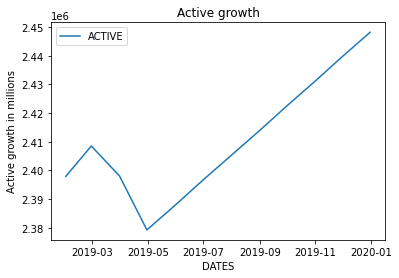

In [13]:
plt.plot(sample_interpol.ACTIVE )

plt.xlabel('DATES')
plt.ylabel('Active growth in millions')
plt.legend(['ACTIVE', 'CUTOFF'])
plt.title('Active growth',loc='center')
plt.show()

# Cutoff users are expected to decrease rapidly by 2020
## Cutoff users increased in the first two month by reach pick in the third month and increase again in the fourth month, however in the fifth month they start to decrease rapidly till end of the year 2019, so cutoff is expected to decrease with an avarege below 212000

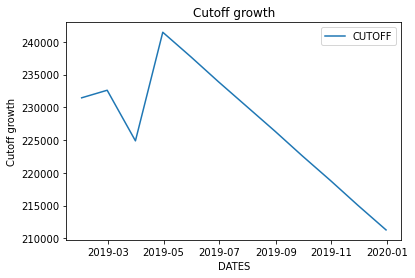

In [14]:
plt.plot(sample_interpol.CUTOFF )

plt.xlabel('DATES')
plt.ylabel('Cutoff growth')
plt.legend([ 'CUTOFF'])
plt.title('Cutoff growth',loc='center')
plt.show()

# Deactivated users are axpected to decrease by 2020
##  Deactivated users increased rapidly in the first  two month, reaching the pick in the third month and decrease rapidly in the fourth month till the fifth month,and from there the line decrease slowly, so deactivated users are expected to decrease in 2020 by an avarage below 3400

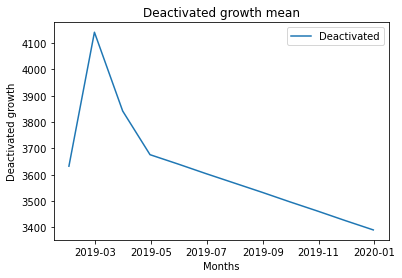

In [15]:
plt.plot(sample_interpol.DEACTIVATED)

plt.xlabel('Months')
plt.ylabel('Deactivated growth')
plt.legend(['Deactivated'])
plt.title('Deactivated growth mean',loc='center')
plt.show()

# Expired user are axpected to decrease by 2020
### Expired user were increasing slowly for the first two months however, increasing rapidily  from the third month up to the fourth month, reaching the peak in the fifth moth,and from the decreasing rapidily till the end of the year. it is expeted expired users to decrease in 2020 with an avarage below 115000

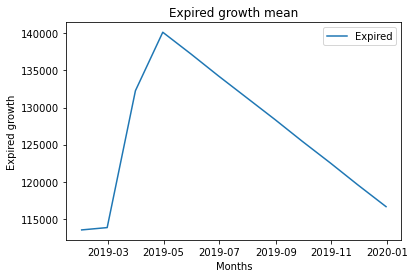

In [33]:
plt.plot(sample_interpol.EXPIRED)

plt.xlabel('Months')
plt.ylabel('Expired growth')
plt.legend(['Expired'])
plt.title('Expired growth mean',loc='center')
plt.show()

# Installed preactive user are expected to decrease by 2020
## Istalled preactive users were increasing slowly for the first three months, increasing rapidly in the fourth month and reaching the peak in the fifth month, and from there it has been decreasing slowly, it is expected the installed preactive to decrease by 202 with an avarage below 750000

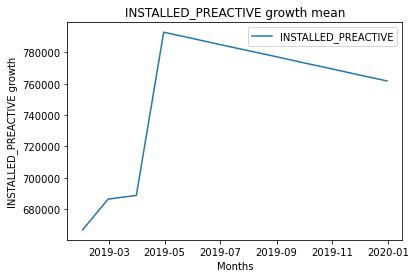

In [16]:
plt.plot(sample_interpol.INSTALLED_PREACTIVE)

plt.xlabel('Months')
plt.ylabel('INSTALLED_PREACTIVE growth')
plt.legend(['INSTALLED_PREACTIVE'])
plt.title('INSTALLED_PREACTIVE growth mean',loc='center')
plt.show()

# Suspended users are expected to increase by 2020
## Suspended users increased reapidly for the first two months, reaching the peak in third month and decreased slowly in the same month and in the fourth month decreased rapidly and start to increase slowly form the fifth month till the end of the year

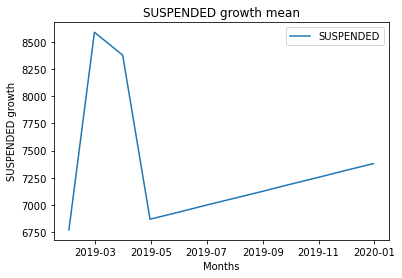

In [17]:
plt.plot(sample_interpol.SUSPENDED)

plt.xlabel('Months')
plt.ylabel('SUSPENDED growth')
plt.legend(['SUSPENDED'])
plt.title('SUSPENDED growth mean',loc='center')
plt.show()